In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv("apple_quality.csv")

In [3]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [5]:
df.shape

(4001, 9)

In [6]:
df.nunique()

A_id           4000
Size           4000
Weight         4000
Sweetness      4000
Crunchiness    4000
Juiciness      4000
Ripeness       4000
Acidity        4001
Quality           2
dtype: int64

In [7]:
df.duplicated().sum()

0

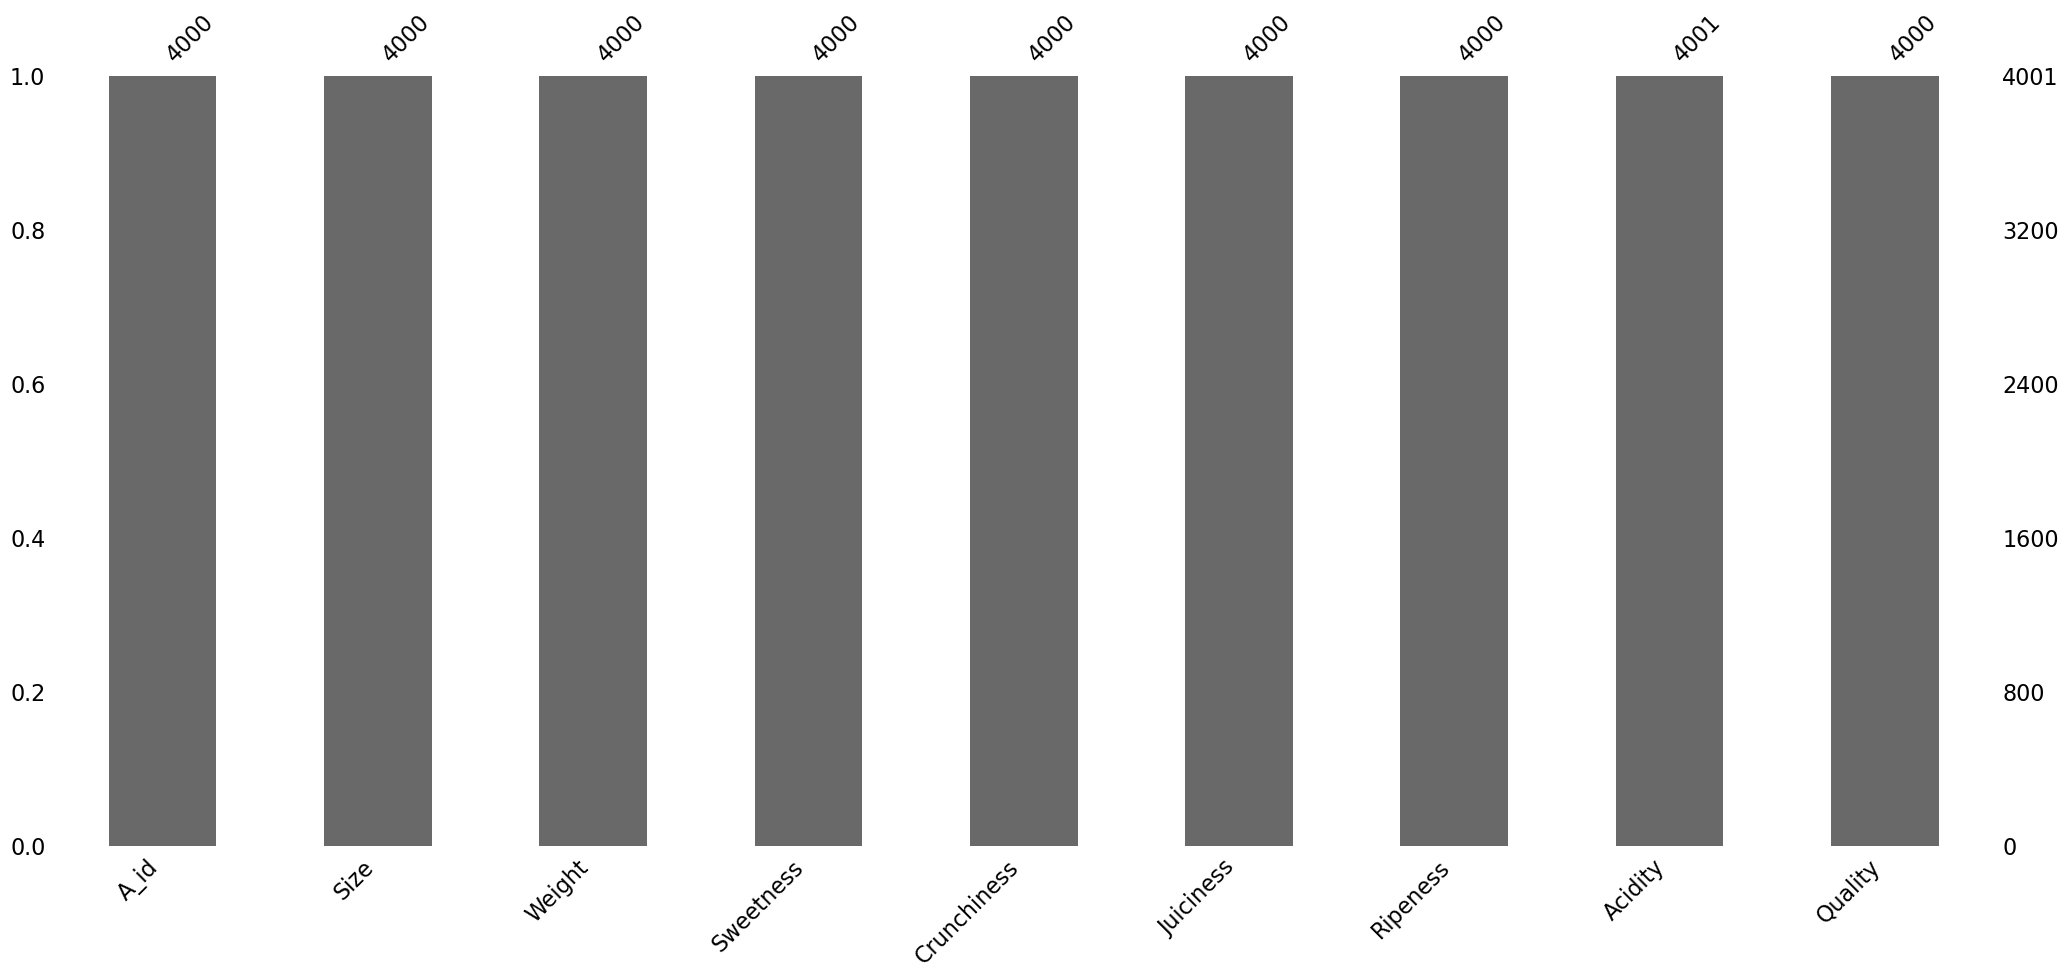

In [8]:
msno.bar(df)
plt.show()

In [9]:
df.dropna(inplace=True)

In [10]:
df.drop(columns="A_id",inplace=True)

In [11]:
df.tail()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [12]:
def inplace_encode_categorical_columns(df):

    label_encoders = {}
    for column in df.select_dtypes(include='object').columns:
        df[column] = df[column].astype(str)
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return label_encoders

In [13]:
inplace_encode_categorical_columns(df)

{'Acidity': LabelEncoder(), 'Quality': LabelEncoder()}

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   int32  
 7   Quality      4000 non-null   int32  
dtypes: float64(6), int32(2)
memory usage: 250.0 KB


In [15]:
df.Quality.value_counts()

1    2004
0    1996
Name: Quality, dtype: int64

# EDA

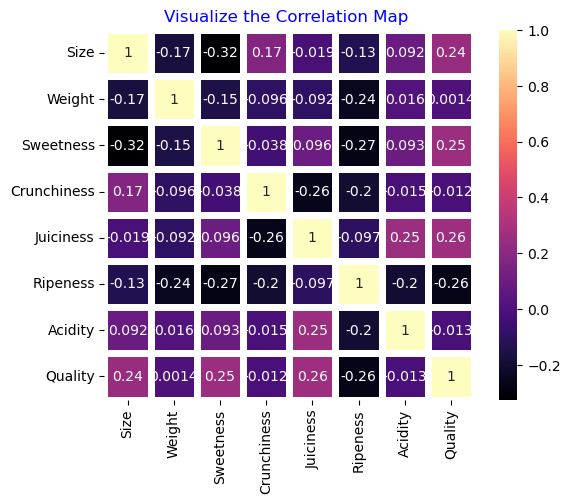

In [16]:
sns.heatmap(df.corr(),cmap='magma',linewidths=5,square=True,annot=True)
plt.title("Visualize the Correlation Map ",color ="b")
plt.show()

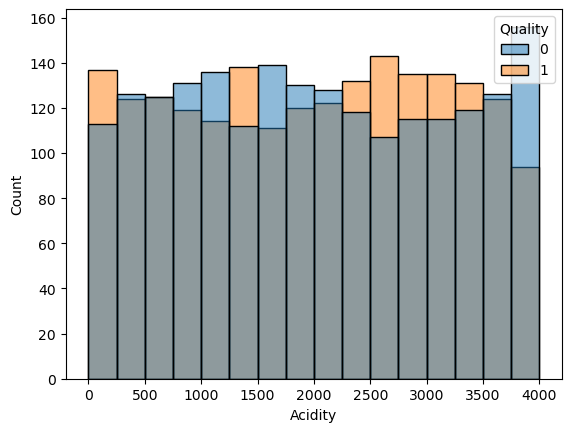

In [17]:
sns.histplot(x = 'Acidity' , data = df ,hue="Quality");

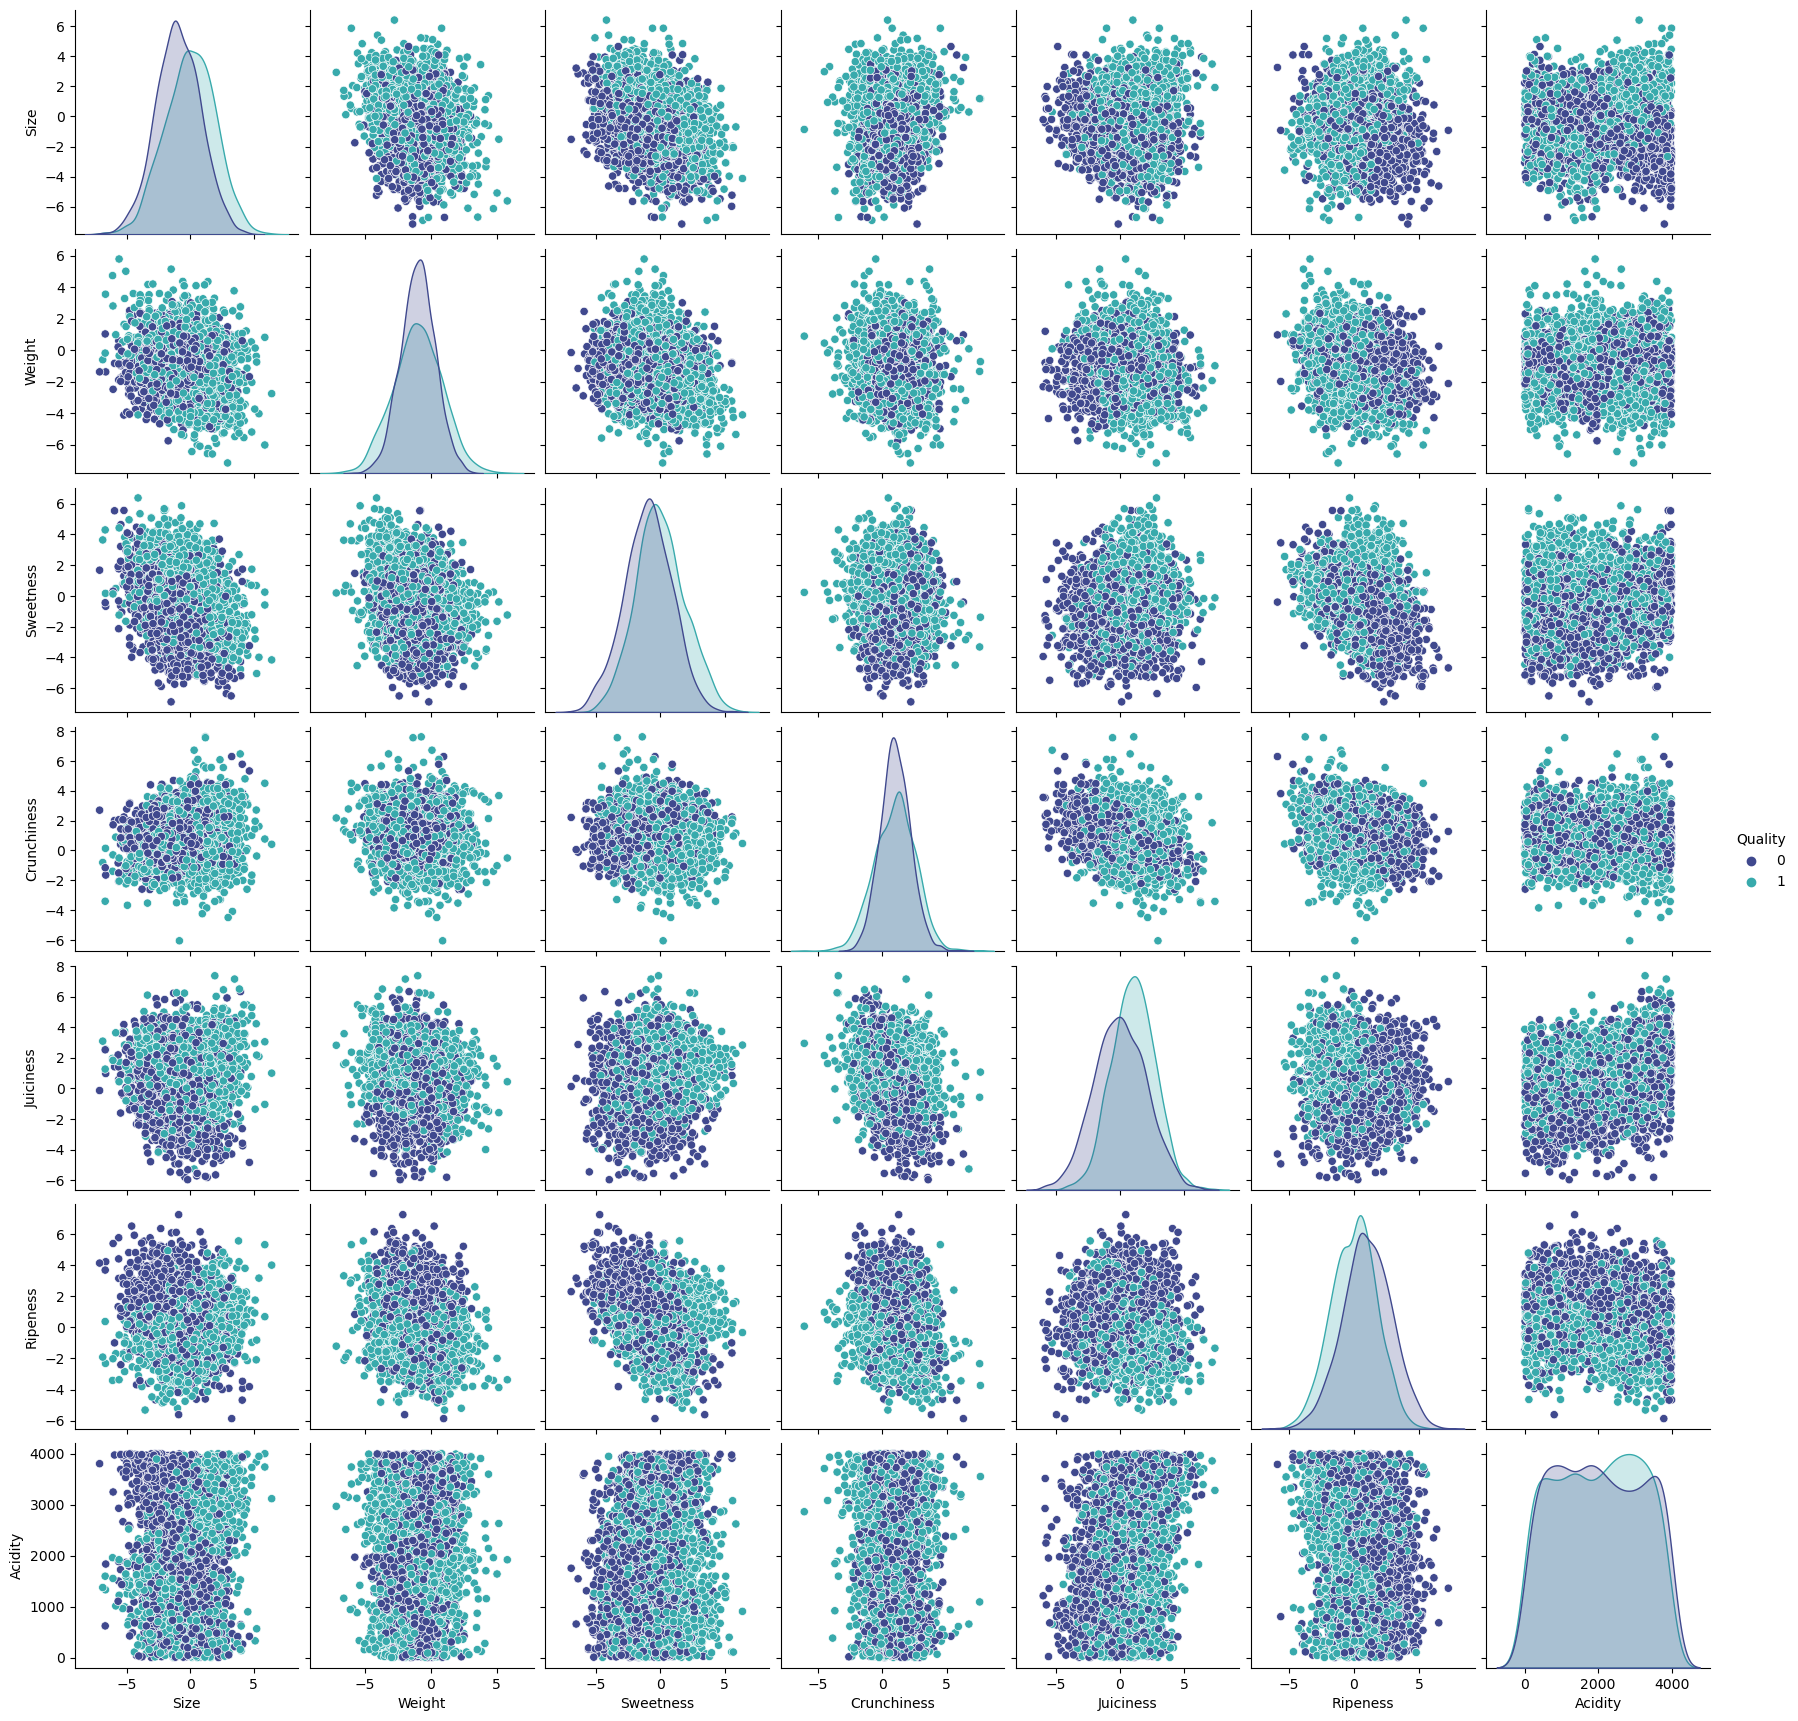

In [18]:
sns.pairplot(df,hue='Quality',palette="mako")


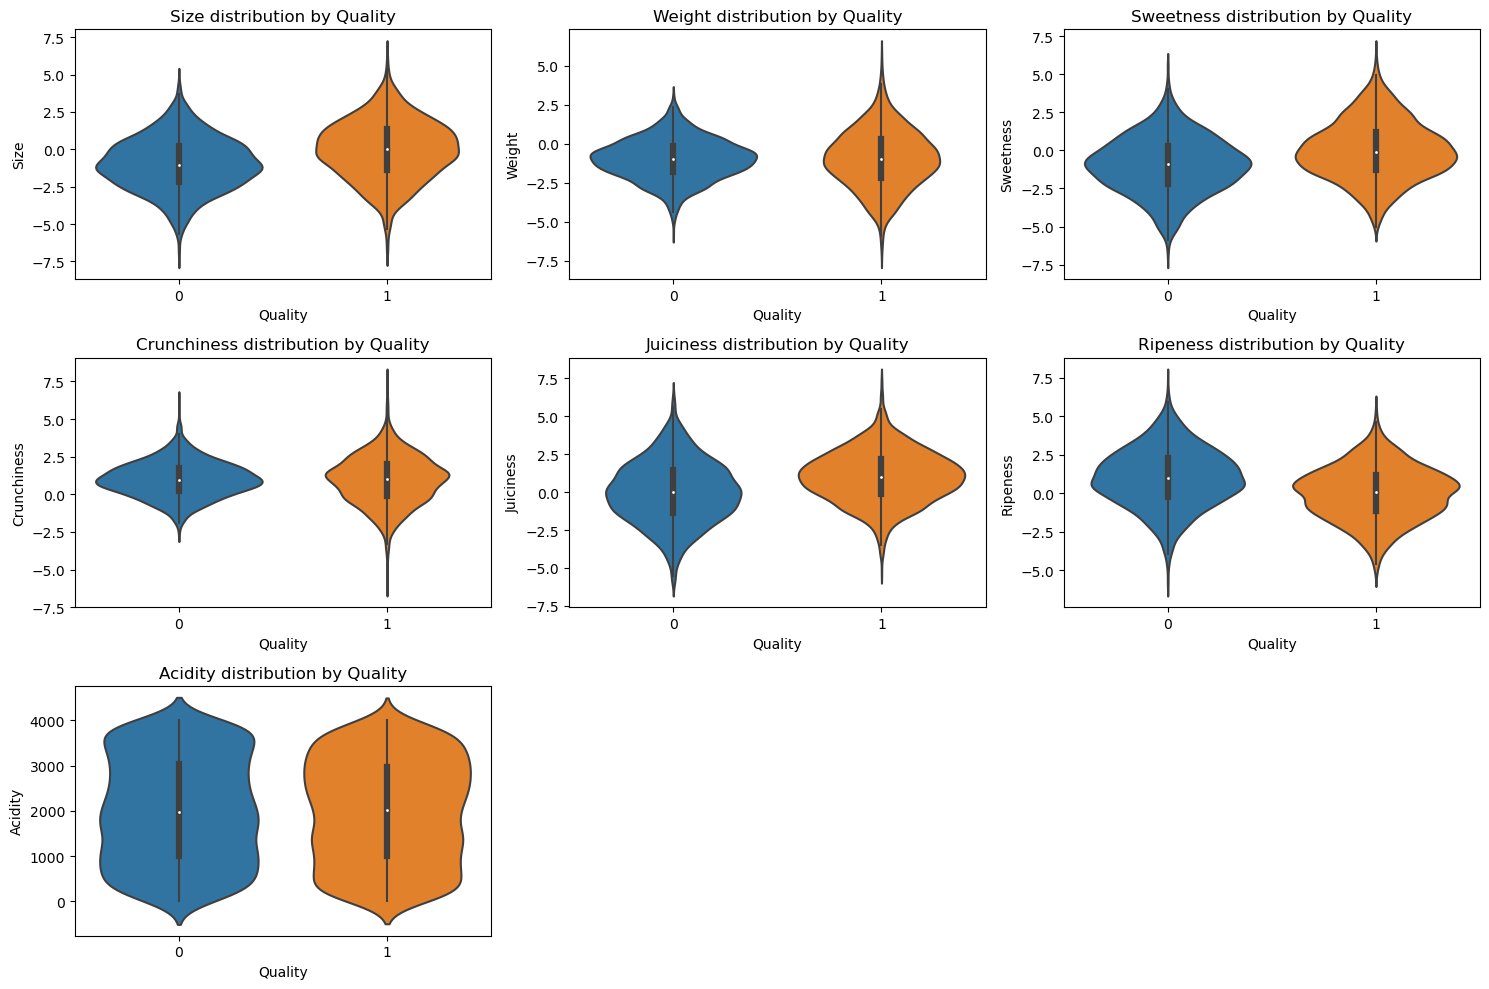

In [19]:
plt.figure(figsize=(15,10))
sns.set_palette('tab10')
for i,feature in enumerate(df.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.violinplot(x='Quality', y=feature, data=df)
    plt.title(f'{feature} distribution by Quality')
plt.tight_layout()
plt.show()

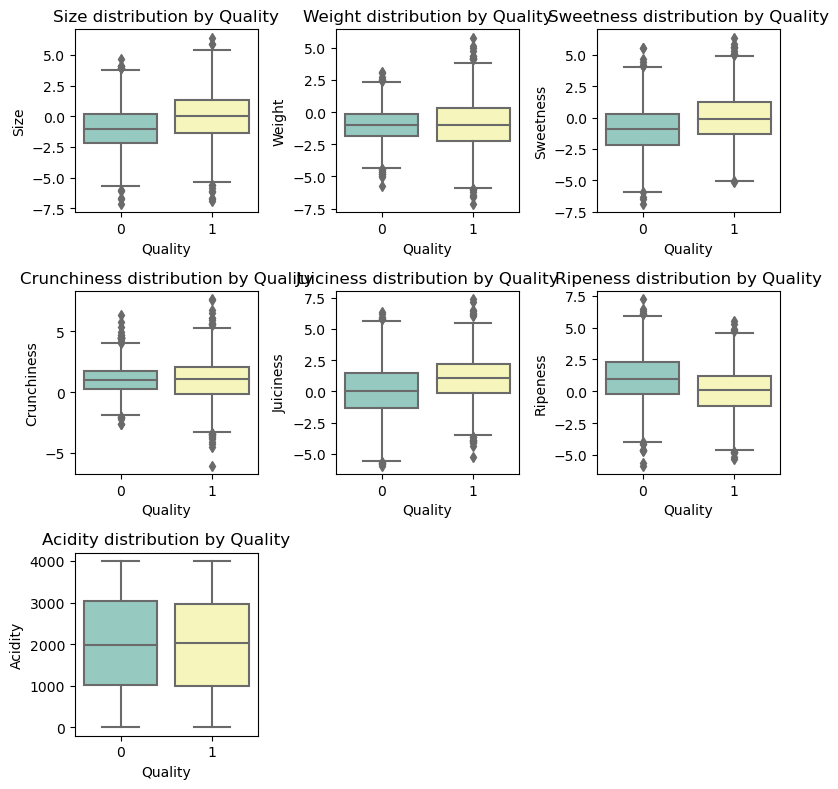

In [20]:
plt.figure(figsize=(8, 8))
sns.set_palette('Set3')

for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Quality', y=feature, data=df)
    plt.title(f'{feature} distribution by Quality')

plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='Quality', ylabel='count'>

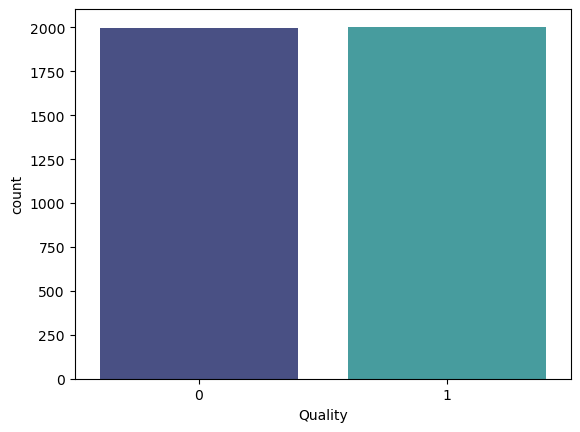

In [21]:
sns.countplot(x='Quality',data=df,palette="mako")


In [22]:
df['Quality'].value_counts()


1    2004
0    1996
Name: Quality, dtype: int64

In [23]:
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity          int32
Quality          int32
dtype: object

# Feature Scaling  


In [26]:
X = df.drop(['Quality'],axis = 1)
y = df['Quality']

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)      

## Choose Best Model

In [35]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

best_model = None
best_accuracy = 0
best_difference = float('inf')

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'GaussianNB':GaussianNB()
    
}

# Fit and predict for each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Predict on train data
    y_pred_train = model.predict(X_train)

    # Calculate accuracy
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    # Print model scores
    print(f"Model: {name}")
    print(f"{name} Test Accuracy: {accuracy_test:.4f}")
    print(f"{name} Train Accuracy: {accuracy_train:.4f}")

    print("\nCompare the train-set and test-set accuracy\n")
    print("Check for overfitting and underfitting\n")
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
    print('Test set score: {:.4f}\n'.format(model.score(X_test, y_test)))    
    # Check for overfitting
    difference = abs(accuracy_train - accuracy_test)
    print(f"Difference between training and testing accuracy: {difference:.4f}")
    print(100*"*")

    # Update best model if it has the highest testing accuracy and minimal overfitting
    if accuracy_test > best_accuracy and difference < best_difference:
        best_model = model
        best_accuracy = accuracy_test
        best_difference = difference
        
   
print(f"Best Model: {best_model}")
print(f"Best Testing Accuracy: {best_accuracy:.4f}")
print(f"Difference between training and testing accuracy for the best model: {best_difference:.4f}")


C:\Users\abhi0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Logistic Regression Test Accuracy: 0.7475
Logistic Regression Train Accuracy: 0.7375

Compare the train-set and test-set accuracy

Check for overfitting and underfitting

Training set score: 0.7375
Test set score: 0.7475

Difference between training and testing accuracy: 0.0100
****************************************************************************************************
Model: Decision Tree
Decision Tree Test Accuracy: 0.8058
Decision Tree Train Accuracy: 1.0000

Compare the train-set and test-set accuracy

Check for overfitting and underfitting

Training set score: 1.0000
Test set score: 0.8058

Difference between training and testing accuracy: 0.1942
****************************************************************************************************
Model: Random Forest
Random Forest Test Accuracy: 0.8900
Random Forest Train Accuracy: 1.0000

Compare the train-set and test-set accuracy

Check for overfitting and underfitting

Training set score: 1.00

C:\Users\abhi0\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\abhi0\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim